# 1.Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній No 2за допомогою повнозв’язаної нейромережі прямого поширення (fullyconnectedfeed-forwardnetwork)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#!pip install tensorflow
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
df = pd.read_csv("riceClassification.csv")
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
df = df.drop(['id'],1)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
X = df.drop(['Class'],1)
y = df['Class']

In [5]:
X.shape

(18185, 10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train) 
X_test_scaler = scaler.transform(X_test)

In [8]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
model =  keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(10,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.summary()
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 18,178
Trainable params: 18,178
Non-trainable params: 0
_________________________________________________________________


2021-12-16 01:42:57.536716: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
es = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)
mch = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)
history = model.fit(X_train_scaler, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1, callbacks = [es, mch])

Epoch 1/30
306/319 [===========================>..] - ETA: 0s - loss: 0.6998 - accuracy: 0.5698
Epoch 00001: val_loss improved from inf to 0.56458, saving model to best_model.h5
319/319 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5783 - val_loss: 0.5646 - val_accuracy: 0.8940
Epoch 2/30
311/319 [============================>.] - ETA: 0s - loss: 0.4909 - accuracy: 0.8883
Epoch 00002: val_loss improved from 0.56458 to 0.39057, saving model to best_model.h5
319/319 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.8900 - val_loss: 0.3906 - val_accuracy: 0.9835
Epoch 3/30
300/319 [===========================>..] - ETA: 0s - loss: 0.3548 - accuracy: 0.9681
Epoch 00003: val_loss improved from 0.39057 to 0.27600, saving model to best_model.h5
319/319 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.9691 - val_loss: 0.2760 - val_accuracy: 0.9863
Epoch 4/30
304/319 [===========================>..] - ETA: 0s - l

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Score: {scores}')

Score: [6137.875, 0.45472875237464905]


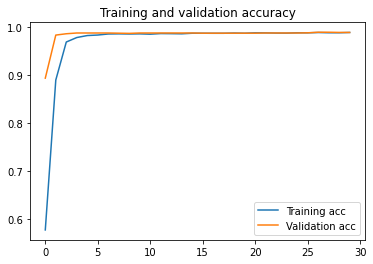

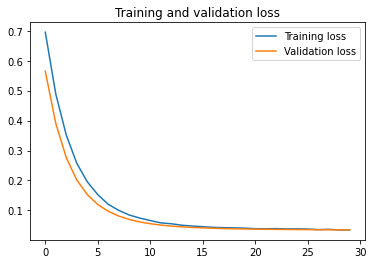

In [12]:
acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(max(history.epoch)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# 2. Вирішіть завдання класифікаціїзображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [13]:
#!pip install opencv-python
import cv2
import os
from tqdm import tqdm


In [14]:
class_names = ['Cheetah', 'Lion', 'Tiger']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names);

datasets = ['Animals_train','Animals_test']

output = []

for dataset in datasets:
    IMAGE_SIZE = (36, 36);
    images = []
    labels = []
    
    print("Loading {}".format(dataset))
    
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE) 
            
            images.append(image)
            labels.append(label)
            
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
    
    output.append((images, labels))

Loading Animals_train


100%|██████████| 23/23 [00:00<00:00, 229.74it/s]


Loading Animals_test


100%|██████████| 9/9 [00:00<00:00, 145.79it/s]


In [15]:
(train_images, train_labels), (test_images, test_labels) = output

In [16]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [17]:
_, train_counts = np.unique(train_labels, return_counts=True)

([<matplotlib.patches.Wedge at 0x13aebd070>,
 [Text(0.4857000550556896, 0.9869627432273724, 'Cheetah'),
  Text(-1.1, 1.3471114790620887e-16, 'Lion'),
  Text(0.4857000550556893, -0.9869627432273725, 'Tiger')],
 [Text(0.2649273027576488, 0.5383433144876576, '35.4%'),
  Text(-0.6, 7.347880794884119e-17, '29.1%'),
  Text(0.2649273027576487, -0.5383433144876577, '35.4%')])

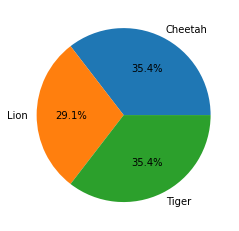

In [18]:
plt.pie(train_counts, labels=class_names, autopct='%1.1f%%')

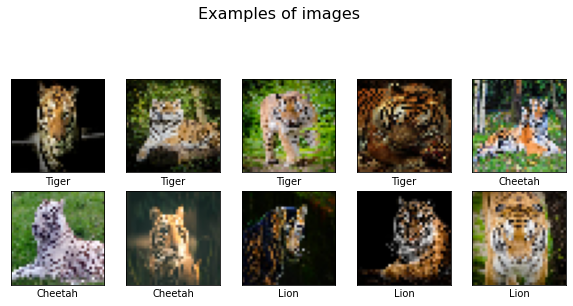

In [19]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Examples of images", fontsize=16)
k = 0
for i in range(0, 30,3):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
    k+=1
plt.show()

In [20]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [21]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [22]:
model = keras.Sequential()
model.add(Conv2D(32, 3, padding='valid', activation='relu', input_shape=(36, 36, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))




model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 34, 34, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 17, 17, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)        

In [23]:
monitor = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, monitor='val_accuracy', restore_best_weights=True)


In [24]:
history = model.fit(train_images, y_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1, callbacks=[monitor])


Epoch 1/30
1/1 [==============================] - 1s 977ms/step - loss: 1.8542 - accuracy: 0.3175 - val_loss: 1.3158 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 139ms/step - loss: 2.1235 - accuracy: 0.4603 - val_loss: 1.3807 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 135ms/step - loss: 1.2099 - accuracy: 0.7302 - val_loss: 1.4026 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 139ms/step - loss: 0.9577 - accuracy: 0.7302 - val_loss: 1.3699 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 131ms/step - loss: 0.3187 - accuracy: 0.8889 - val_loss: 1.3327 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 134ms/step - loss: 0.1895 - accuracy: 0.9048 - val_loss: 1.2895 - val_accuracy: 0.0000e+00


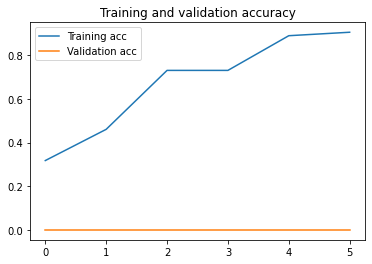

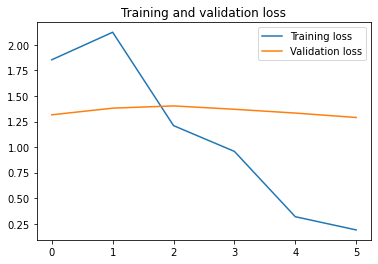

In [25]:
acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(max(history.epoch)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [26]:
score = model.evaluate(test_images, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0945736169815063
Test accuracy: 0.3333333432674408


In [27]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

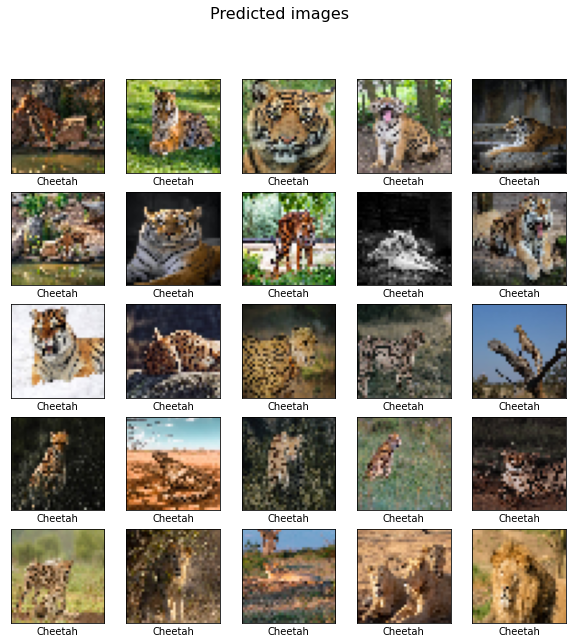

In [28]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Predicted images", fontsize=16)
k = 0
for i in range(0, 25, 1):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred_labels[i]])
    k+=1
plt.show()

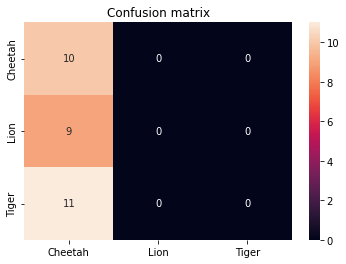

In [29]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           xticklabels=class_names, 
           yticklabels=class_names, ax=ax)
ax.set_title('Confusion matrix')
plt.show()

# 3. Вирішіть одну з трьох задач за вашим вибором: класифікації текстів, класифікації часових рядів або прогнозування значень часового ряду за допомогою рекурентної нейромережі

In [30]:
df = pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [31]:
df = df.drop(['Name'],1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2006-01-03,10.34,10.68,10.32,10.68,201853036
1,2006-01-04,10.73,10.85,10.64,10.71,155225609
2,2006-01-05,10.69,10.70,10.54,10.63,112396081
3,2006-01-06,10.75,10.96,10.65,10.90,176139334
4,2006-01-09,10.96,11.03,10.82,10.86,168861224


<AxesSubplot:>

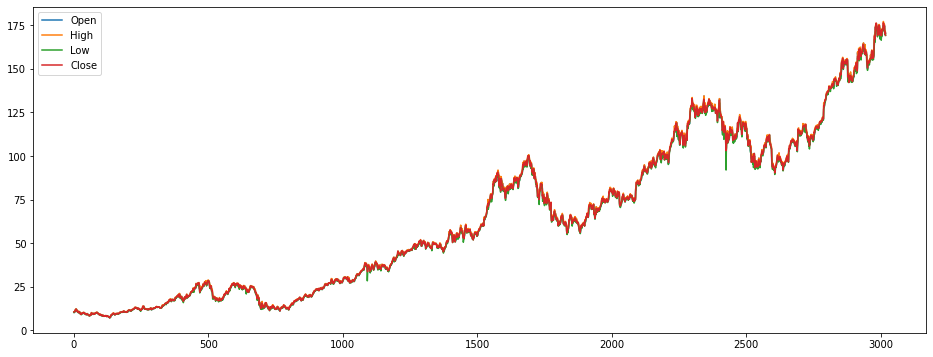

In [32]:
df[['Open','High', 'Low','Close']].plot(figsize = (16, 6))

In [33]:
X = df.drop(['Date','Close'],1);
y = df['Close']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
model=Sequential()

model.add(Dense(10))
model.add(Flatten())
model.add(Dense(13, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)


model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
67/67 [==============================] - 1s 2ms/step - loss: 180593560125440.0000
Epoch 2/20
67/67 [==============================] - 0s 1ms/step - loss: 32159179997184.0000
Epoch 3/20
67/67 [==============================] - 0s 1ms/step - loss: 9444525080576.0000
Epoch 4/20
67/67 [==============================] - 0s 1ms/step - loss: 2939104526336.0000
Epoch 5/20
67/67 [==============================] - 0s 1ms/step - loss: 1248389103616.0000
Epoch 6/20
67/67 [==============================] - 0s 1ms/step - loss: 628722958336.0000
Epoch 7/20
67/67 [==============================] - 0s 1ms/step - loss: 313954402304.0000
Epoch 8/20
67/67 [==============================] - 0s 1ms/step - loss: 170425188352.0000
Epoch 9/20
67/67 [==============================] - 0s 1ms/step - loss: 93893189632.0000
Epoch 10/20
67/67 [==============================] - 0s 1ms/step - loss: 52417290240.0000
Epoch 11/20
67/67 [==============================] - 0s 1ms/step - loss: 30588024832.0000
Epo

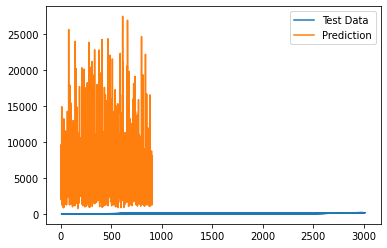

In [36]:
prediction = model.predict(X_test)


plt.plot(y_test, label='Test Data') 
plt.plot(prediction, label='Prediction') 
plt.legend()
plt.show() 